# Context
Online retail company XYZ sells various products and looking to increase its revenue by <b>promoting cross-selling</b> (i.e. selling related or complementary items) opportunities to its customers. The company is looking to apply advanced analytics on its historical transactional data to answer the following <b>business question:</b>

When a customer buys an item, what are the <i>related or complementary items</i> that can be presented to them to promote cross-selling?

# Project

1) <b>Machine Learning:</b> Generate frequent itemsets and association rules for a recommender system using Association Rule Mining. <i>Feel free to choose appropriate levels of minimum support and minimum confidence (e.g., 0.20 support and 30% confidence).</i>


2) <b>Insights:</b> Make two business recommendations to deliver business outcomes from this association rule based recommender system. 

3) <b>Research:</b> Identify three additional business use cases where Association Rule Mining can be used to deliver business outcomes? 

## Machine Learning
Recommender systems can be developed through multiple techniques such as association rule, content based filtering and collaborative filtering. 

In this project, we will focus more on the association rule approach which is an unsupervised machine learning technique. It works by:
- Finding "frequent itemsets" which is a set of items that appears frequently together. These itesets are a combination of the antecedents (in the cart) and consequents (recommended items). The key concepts associated are minimum support and confidence threshold. 
  - Support: This gives an idea of how frequent an itemset is in all the transactions
  - Confidence: This defines the probability of occurrence of a consequent withthe given antecedents.
- Establishing association rules from frequent itemsets.

Common algorithms used: Apriori & FP-Growth

In [1]:
# Import neccessary packages
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import random 
%matplotlib inline

In [2]:
# Import dataset
transactions_data = pd.read_excel("transactions_by_dept.xlsx")

### Examining & cleaning the dataset

In [3]:
transactions_data.head()

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1


<b>We have 4 columns:</b>
- POS TXN: Point of Sale Transaction
- Dept: Department this item is associated with (for e.g. candy)
- ID: Unique item id. 
- Sales U: Number of units sold

In [4]:
# Confirm ID's are unique across the dataset and not per department
print(transactions_data['Dept'].nunique())
print(transactions_data['ID'].nunique())

160
160


In [5]:
# Examine the datatype
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 4 columns):
POS Txn    4539 non-null uint64
Dept       4539 non-null object
ID         4539 non-null int64
Sales U    4539 non-null int64
dtypes: int64(2), object(1), uint64(1)
memory usage: 142.0+ KB


In [6]:
# Data summary
transactions_data.describe()

,POS Txn,ID,Sales U
count,4.539000e+03,4539.000000,4539.000000
mean,1.612010e+19,137.546816,1.764265
std,3.282793e+07,67.255705,1.842388
min,1.612010e+19,1.000000,-9.000000
25%,1.612010e+19,93.000000,1.000000
50%,1.612010e+19,152.000000,1.000000
75%,1.612010e+19,176.000000,2.000000
max,1.612010e+19,311.000000,24.000000


In [7]:
# Number of unique transactions out of 4,539
transactions_data['POS Txn'].nunique()

2064

In [8]:
transactions_data.head()

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1


In [9]:
# Let's check the frequency for each category / department
transactions_data['Dept'].value_counts()

0982:SPIRITS                 314
0973:CANDY                   275
0962:BEVERAGES               253
0597:HEALTH AIDS             200
0983:WINE                    192
                            ... 
0187:PETITE COLLECTIONS        1
0099:MISC CUSTOM SERVICES      1
0033:VENDING RETAIL            1
0370:OPPORTUNITY BUYS          1
0579:CONSIGNMENT WATCHES       1
Name: Dept, Length: 160, dtype: int64

### Visualizing the Data
We noticed that transactions by some departments are very little (1 transaction). We will extract departments that had low transactions for our visualization by setting a threshold of 50.

In [10]:
transactions_data_mod = transactions_data[transactions_data['Dept'].map(transactions_data['Dept'].value_counts()) > 50]


In [11]:
# This brought down the number of departments from 160 to 20!
transactions_data_mod['Dept'].nunique()

20

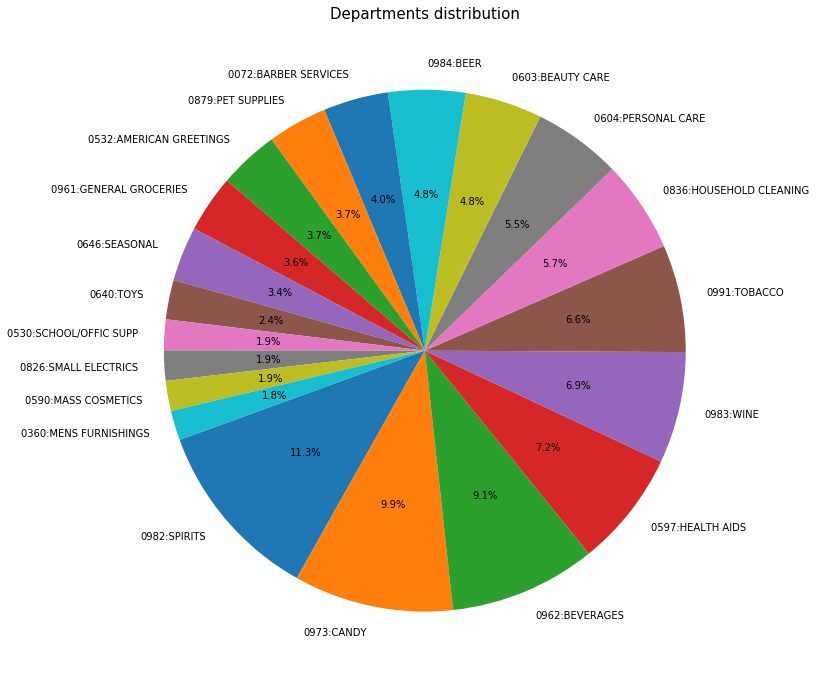

In [12]:
# Now, let's have a look at the proportion of transactions of those departments
plt.figure(figsize=(12,12))
temp_series = transactions_data_mod['Dept'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Here we can notice that most of the transactions were for spirits, candy, beverages and health aids. 

In [13]:
# Time to prepare our dataset for our further analysis! We may use our original dataset here
basket = transactions_data_mod.groupby(['POS Txn', 'Dept'])['Sales U'].sum().unstack().reset_index().fillna(0).set_index("POS Txn")

In [14]:
basket.head()

Dept,0072:BARBER SERVICES,0360:MENS FURNISHINGS,0530:SCHOOL/OFFIC SUPP,0532:AMERICAN GREETINGS,0590:MASS COSMETICS,0597:HEALTH AIDS,0603:BEAUTY CARE,0604:PERSONAL CARE,0640:TOYS,0646:SEASONAL,0826:SMALL ELECTRICS,0836:HOUSEHOLD CLEANING,0879:PET SUPPLIES,0961:GENERAL GROCERIES,0962:BEVERAGES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO
POS Txn,,,,,,,,,,,,,,,,,,,,
16120100160021008773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,4.0,0.0,2.0
16120100160021008774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16120100160021008775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16120100160021008776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
16120100160021008777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


Given the large number of categories (160), it's expected that we have a very sparse matrix. Nonetheless, we still need to clean this data further. We noticed that there are multiple quantities per transaction and sometimes even negative quantities!

Since we are concerned with the existence of a category within a transaction, we will change all positive values to 1. Since the negative values are unexplained (Could be due to a refund for e.g.), we will change all these values to a 0 to eliminate them from our future analysis.

In [15]:
def update_quantity(U):
    if U <= 0:
        return 0
    if U >= 1:
        return 1
    
basket = basket.applymap(update_quantity)
basket.head()

Dept,0072:BARBER SERVICES,0360:MENS FURNISHINGS,0530:SCHOOL/OFFIC SUPP,0532:AMERICAN GREETINGS,0590:MASS COSMETICS,0597:HEALTH AIDS,0603:BEAUTY CARE,0604:PERSONAL CARE,0640:TOYS,0646:SEASONAL,0826:SMALL ELECTRICS,0836:HOUSEHOLD CLEANING,0879:PET SUPPLIES,0961:GENERAL GROCERIES,0962:BEVERAGES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO
POS Txn,,,,,,,,,,,,,,,,,,,,
16120100160021008773,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1
16120100160021008774,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16120100160021008775,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
16120100160021008776,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16120100160021008777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Let's start spinning the Association Rule Mining Algorithm (apriori)
<b>Minimum Support</b><br>
To create our frequent itemsets, we need to set our minimum support parameter. Through trial and error, we set it to <b>1%</b> in order to generate enough itemsets.

In [16]:
frequent_itemsets = apriori(basket, min_support = 0.01, use_colnames = True)
frequent_itemsets.head()

,support,itemsets
0,0.075269,(0072:BARBER SERVICES)
1,0.032258,(0360:MENS FURNISHINGS)
2,0.035618,(0530:SCHOOL/OFFIC SUPP)
3,0.069220,(0532:AMERICAN GREETINGS)
4,0.034274,(0590:MASS COSMETICS)


<b> Confidence </b><br>
Next, we need to set rules through assigning a confidence level threshold. Through trial and error, we assign it to 0.30 to generate enough examples.

In [17]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(0360:MENS FURNISHINGS),(0973:CANDY),0.032258,0.184812,0.010753,0.333333,1.803636,0.004791,1.222782,1
1,(0590:MASS COSMETICS),(0603:BEAUTY CARE),0.034274,0.088710,0.014113,0.411765,4.641711,0.011072,1.549194,1
2,(0590:MASS COSMETICS),(0973:CANDY),0.034274,0.184812,0.012769,0.372549,2.015829,0.006435,1.299206,1
3,(0603:BEAUTY CARE),(0597:HEALTH AIDS),0.088710,0.134409,0.028226,0.318182,2.367273,0.016302,1.269534,1
4,(0604:PERSONAL CARE),(0597:HEALTH AIDS),0.100806,0.134409,0.043011,0.426667,3.174400,0.029461,1.509752,1


In [18]:
print('Number of Associations: {}'.format(rules.shape[0]))

Number of Associations: 32


### Evaluating these rules
So again, let's remember the concepts we explained earlier.
- Support gives an idea of how frequent an itemset appears in the dataset. Looking at the first row, this means that candy and mens furnishings transactions occur 1% of the time.
- Confidence defines the probability of occurrence of a consequent with the given antecedents. For the same example, the confidence is 33% which means that for 33% of the transactions containing mens furnishings, the rule is correct.

With the 32 associations, we can short list them through setting limitations based on desired metrics. 

Through looking at the 32 associations, we find the confidence is a significant metric to consider; therefore, we set a minimum threshold of 0.50. 

Another important metric to pay attention to is <b>lift.</b><br>
While the confidence value depends on the direction of the association, the lift metric indicates whether the associated items occur together in the same order at random.

Given two items, A and B, lift indicates whether there is a relationship between A and B, or whether the two items are occuring together in the same orders simply by chance (ie: at random). Unlike the confidence metric whose value may vary depending on direction. Similarly, the greater the value of lift the better. We will set a minimum threshold of 4.

In [19]:
rules[(rules['confidence'] > 0.5) &
       (rules['lift'] > 4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
15,"(0603:BEAUTY CARE, 0836:HOUSEHOLD CLEANING)",(0597:HEALTH AIDS),0.020161,0.134409,0.011425,0.566667,4.216000,0.008715,1.997519,2
17,"(0836:HOUSEHOLD CLEANING, 0604:PERSONAL CARE)",(0597:HEALTH AIDS),0.024866,0.134409,0.014785,0.594595,4.423784,0.011443,2.135125,2
22,"(0604:PERSONAL CARE, 0973:CANDY)",(0597:HEALTH AIDS),0.020161,0.134409,0.011425,0.566667,4.216000,0.008715,1.997519,2
28,"(0982:SPIRITS, 0973:CANDY)",(0983:WINE),0.020833,0.128360,0.010753,0.516129,4.020942,0.008079,1.801389,2


## Insights
Let's see what we came up with so far:

In [20]:
rules[(rules['confidence'] > 0.5) &
       (rules['lift'] > 4)][['antecedents','consequents']]

,antecedents,consequents
15,"(0603:BEAUTY CARE, 0836:HOUSEHOLD CLEANING)",(0597:HEALTH AIDS)
17,"(0836:HOUSEHOLD CLEANING, 0604:PERSONAL CARE)",(0597:HEALTH AIDS)
22,"(0604:PERSONAL CARE, 0973:CANDY)",(0597:HEALTH AIDS)
28,"(0982:SPIRITS, 0973:CANDY)",(0983:WINE)


Health aids are strongly associated with:
- beauty care, household cleaning
- household cleaning, personal care
- candy, personal care

Wine is strongly associated with:
- candy, spirits

Accordingly:
- <b>Recommend </b> health aids for beauty care, household cleaning and personal care purchases. 
<br>(candy has not been included as it may be conflicting with a health lifestyle)
- <b>Recommend </b> wine for those purchasing spirits or candy, especially chocolate ;)

## Research
Identify three additional business use cases where Association Rule Mining can be used to deliver business outcomes?

In [21]:
d = {'Business Question': ["Items at checkout?", "Team Creative","Diagnosis ~ Diagnostic Test?"],
     'Data Need': ["Select grocery items", "Diverse Portfolios","Medical data"],
     'Predictive Analytics': ["Association Rule Mining", "Association Rule Mining","Association Rule Mining"],
     'Business Action': ["Increase impulse purchase value", "Team Structuring","Reduce unneccessary tests"],
     'Business Outcome': ["Higher revenues", "Scientify Diversity","Reduced costs & time"]}
business_case = pd.DataFrame(data=d)
business_case

,Business Question,Data Need,Predictive Analytics,Business Action,Business Outcome
0,Items at checkout?,Select grocery items,Association Rule Mining,Increase impulse purchase value,Higher revenues
1,Team Creative,Diverse Portfolios,Association Rule Mining,Team Structuring,Scientify Diversity
2,Diagnosis ~ Diagnostic Test?,Medical data,Association Rule Mining,Reduce unneccessary tests,Reduced costs & time


<b><u>Use-case 1:</u></b>
Ever wondered why they choose the items selected at the cashier on you way out from the grocery? Are the right choices being optimized for impulse buys?

Candy is the usual impulse buy, but why not figure out what we can add besides candy? To leverage Association Rule Mining, we may learn what items are usually highly associated with candy and within size constraints to increase impulse purchases price values. These items will also need to be stored off-shelf (not refrigerated).

Ultimately, if we're able to sell higher prices items at same volumes, we can reap more revenues.

______________________________________________________________________________________________

<b><u>Use-case 2:</u></b>
Diversity, diversity, diversity is something we're repeatedly told is important to foster creativity within team settings.

But what elements of diversity are associated with creativity? For this project, the data is not easy. We need to find metrics to measure team profiles such as diversity in academia, age, gender, career backgrounds. These profiles will be pulled from projects that have been ranked as creative on a creative project assessment rubric agreed upon by the study supervisor.

We aim to find the elements which are highly associated together to try to understand what diversity factors matter the most. Through learning that, we are able to understand how to build stronger creative teams in the future.

______________________________________________________________________________________________

<b><u>Use-case 3:</u></b>
On a more serious tone, one other use cases would be in an emergency department that's experiences a large influx of patients and both time and $ are critical considerations. The question when do we really need to perform a diagnostic test?

The data required are patient diagnosis obtained from the emergency department updated on a regular basis and classification of diseases.

What we are trying to ultimately do is reduce the number of unnecessary tests by offering diagnostic tests for the diseases highly associated with the symptoms. Ultimately, the emergency department is utilizing time in examining more patients and reduced costs for patients.